### Table of Contents:
* [1. Feature selection and improve accuracy of data mining results ](#1)
* &emsp;[1.1. Importing Libraries](#11)
* &emsp;[1.2. Converting categorical data to numerical](#12)
* &emsp;[1.3. Correlation Matrix](#13)
* &emsp;[1.4. Heat-Map of correlation Matrix](#14)
* &emsp;[1.5. Relevant attributes to improve the accuracy of data mining results](#15)

# 1. Feature selection and improve accuracy of data mining results <a class="anchor" id="1"></a>

Select relevant attributes from your dataset to improve the accuracy of data mining results. 

## 1.1. Importing Libraries <a class="anchor" id="11"></a>

In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Converting categorical data to numerical <a class="anchor" id="12"></a>

In [2]:
df = pd.read_csv('data/training_data.csv')

In [3]:
categorical_features = ['company','country','director','genre','rating','released','star','year',
                        'writer','original_title','overview','tagline','title','genres_edited',
                        'spoken_languages_edited','production_countries_edited','keywords_edited']
continuous_features = ['budget','runtime','score','votes','popularity']
normalized_features = [e+'_norm' for e in continuous_features]
target_features = ['isprofit','profitability_ratio']
all_features = categorical_features + continuous_features + normalized_features + target_features

In [4]:
df['company']=df['company'].astype('category').cat.codes
df['country']=df['country'].astype('category').cat.codes
df['director']=df['director'].astype('category').cat.codes
df['genre']=df['genre'].astype('category').cat.codes
df['rating']=df['rating'].astype('category').cat.codes
df['star']=df['star'].astype('category').cat.codes
df['writer']=df['writer'].astype('category').cat.codes

## 1.3. Correlation Matrix <a class="anchor" id="13"></a>

In [5]:
corr_df=df[all_features].corr()

In [6]:
corr_df

,company,country,director,genre,rating,star,year,writer,budget,runtime,score,votes,popularity,budget_norm,runtime_norm,score_norm,votes_norm,popularity_norm,isprofit,profitability_ratio
company,1.000000,0.044903,-0.003832,-0.097578,0.052997,0.082086,-0.037464,0.018282,0.080479,0.040218,0.039626,0.048675,-0.024868,0.080479,0.040218,0.039626,0.048675,-0.024868,-0.055828,-0.043939
country,0.044903,1.000000,0.031868,0.002753,-0.021629,0.015927,-0.064756,-0.033355,0.125667,-0.025377,-0.136015,0.113584,0.096539,0.125667,-0.025377,-0.136015,0.113584,0.096539,0.170677,0.168938
director,-0.003832,0.031868,1.000000,0.043372,-0.043736,0.008958,0.023839,0.095577,0.066530,0.017743,0.035285,0.025259,0.015105,0.066530,0.017743,0.035285,0.025259,0.015105,-0.029619,-0.015522
genre,-0.097578,0.002753,0.043372,1.000000,0.122715,-0.043071,0.009895,-0.000672,-0.435223,-0.044168,0.076276,-0.169355,-0.207220,-0.435223,-0.044168,0.076276,-0.169355,-0.207220,0.090463,0.073157
rating,0.052997,-0.021629,-0.043736,0.122715,1.000000,-0.000199,0.031053,0.022065,-0.325945,0.132691,0.038821,0.120472,-0.078211,-0.325945,0.132691,0.038821,0.120472,-0.078211,-0.146331,-0.126191
star,0.082086,0.015927,0.008958,-0.043071,-0.000199,1.000000,0.011017,0.059190,0.042878,-0.016972,-0.015140,0.025866,-0.018849,0.042878,-0.016972,-0.015140,0.025866,-0.018849,-0.027987,-0.002620
year,-0.037464,-0.064756,0.023839,0.009895,0.031053,0.011017,1.000000,-0.021771,-0.002143,0.090822,0.051764,-0.116515,0.272799,-0.002143,0.090822,0.051764,-0.116515,0.272799,0.021672,0.089314
writer,0.018282,-0.033355,0.095577,-0.000672,0.022065,0.059190,-0.021771,1.000000,-0.083735,0.021094,0.030355,-0.013546,-0.057440,-0.083735,0.021094,0.030355,-0.013546,-0.057440,-0.057094,-0.015468
budget,0.080479,0.125667,0.066530,-0.435223,-0.325945,0.042878,-0.002143,-0.083735,1.000000,0.154105,-0.096295,0.358726,0.361063,1.000000,0.154105,-0.096295,0.358726,0.361063,-0.032463,-0.057457
runtime,0.040218,-0.025377,0.017743,-0.044168,0.132691,-0.016972,0.090822,0.021094,0.154105,1.000000,0.401359,0.322238,0.185206,0.154105,1.000000,0.401359,0.322238,0.185206,0.035598,0.026216


## 1.4. Heat-Map of correlation Matrix <a class="anchor" id="14"></a>

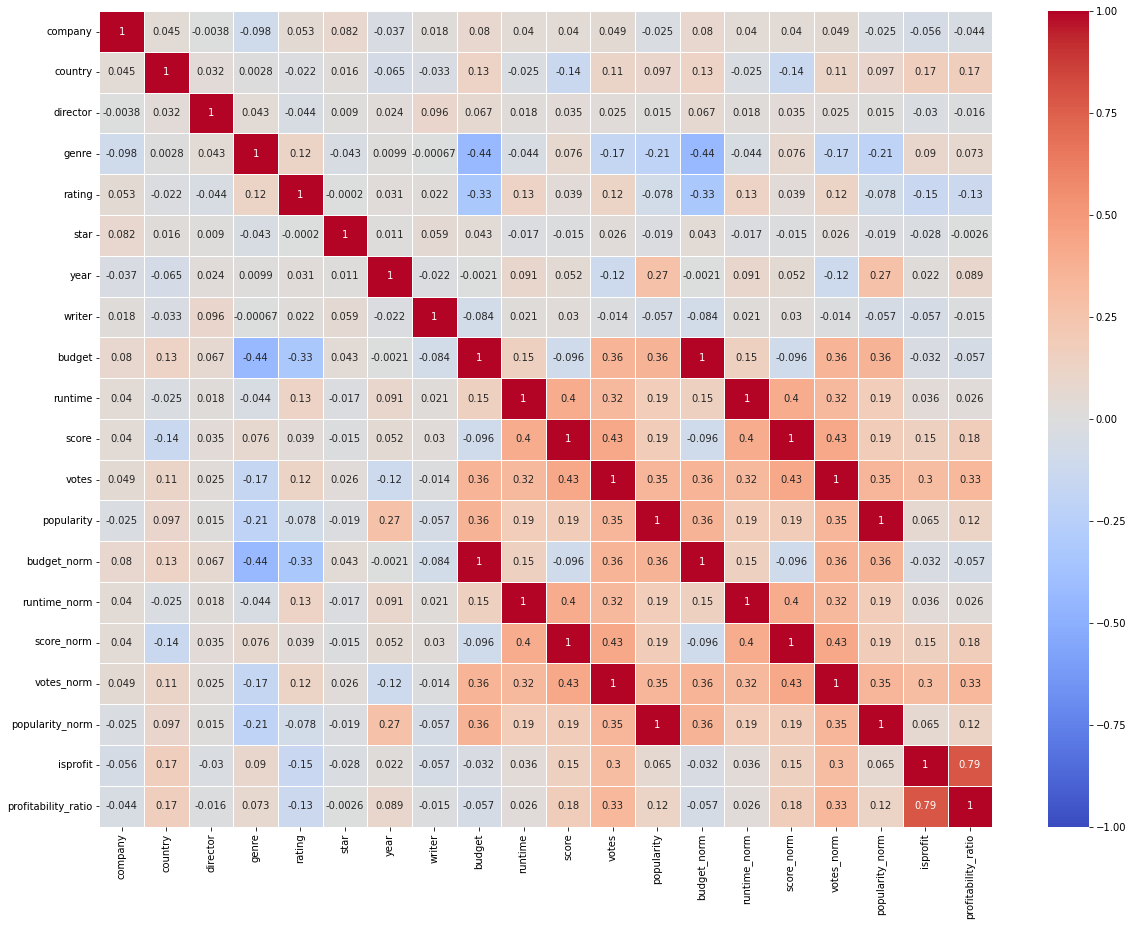

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_df,cmap='coolwarm',vmin=-1, vmax=1,annot=True,linewidth=.5);


## 1.5. Relevant attributes to improve the accuracy of data mining results <a class="anchor" id="15"></a>

In [8]:
corr_df_features = set()
for i in range(len(corr_df.columns)-2):
    if corr_df.iloc[i,18]<-0.04 or corr_df.iloc[i,18]>0.04 or \
        corr_df.iloc[i,19]<-0.04 or corr_df.iloc[i,19]>0.04:
        corr_df_features.add(corr_df.columns[i])

In [9]:
corr_df_features

{'budget',
 'budget_norm',
 'company',
 'country',
 'genre',
 'popularity',
 'popularity_norm',
 'rating',
 'score',
 'score_norm',
 'votes',
 'votes_norm',
 'writer',
 'year'}

In [10]:
df[list(corr_df_features)+['isprofit','profitability_ratio']].to_csv('data/final_training_data.csv')